# Practice with no cleaning

In [97]:
import matplotlib.pyplot as plt
from math import exp
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.feature_selection import RFECV

In [2]:
df = pd.read_csv('kc_house_data_train.csv')

In [3]:
df.drop(columns=['date'],inplace = True)

In [4]:
df.head()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [5]:
features = ['sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']

In [6]:
target = df['price']

In [8]:
df_features = df[features]

# First baseline model with no polynomial, no data cleaning, and engineered features

In [9]:
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(df_features, target)

#access output
print(lm.intercept_)
print(lm.coef_)
print("R^2: ", lm.score(df_features, target))

1243879.757182647
[ 1.10333057e+02  1.28106558e-01  1.60535776e+04  6.07512097e+05
  5.56135383e+04  2.64901933e+04  1.01632182e+05  6.84432426e+01
  4.18898141e+01 -2.34485676e+03  2.44136347e+01 -5.44233500e+02
  6.08919174e+05 -2.21067007e+05  2.14832453e+01 -2.78143667e-01]
R^2:  0.6919132637317037


# Using SKlearn to create my polynomial features

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

In [11]:
poly_data = poly.fit_transform(df_features)

In [12]:
poly_data

array([[2.07000000e+03, 8.89300000e+03, 2.00000000e+00, ...,
        5.71210000e+06, 1.84030000e+07, 5.92900000e+07],
       [2.90000000e+03, 6.73000000e+03, 1.00000000e+00, ...,
        5.61690000e+06, 1.48907100e+07, 3.94760890e+07],
       [3.77000000e+03, 1.08930000e+04, 2.00000000e+00, ...,
        1.37641000e+07, 3.59313500e+07, 9.37992250e+07],
       ...,
       [1.05000000e+03, 9.87600000e+03, 1.00000000e+00, ...,
        3.09760000e+06, 1.65492800e+07, 8.84164090e+07],
       [1.90000000e+03, 4.31860000e+04, 1.50000000e+00, ...,
        4.32640000e+06, 2.24698240e+08, 1.16700488e+10],
       [1.33000000e+03, 6.76800000e+03, 1.00000000e+00, ...,
        1.74240000e+06, 9.12120000e+06, 4.77481000e+07]])

In [13]:
poly_columns = poly.get_feature_names(df_features.columns)

In [14]:
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [15]:
df_poly.head()

,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living sqft_basement,sqft_living yr_built,sqft_living yr_renovated,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot yr_built,sqft_lot yr_renovated,sqft_lot zipcode,sqft_lot lat,sqft_lot long,sqft_lot sqft_living15,sqft_lot sqft_lot15,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_above,floors sqft_basement,floors yr_built,floors yr_renovated,floors zipcode,floors lat,floors long,floors sqft_living15,floors sqft_lot15,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_above,waterfront sqft_basement,waterfront yr_built,waterfront yr_renovated,waterfront zipcode,waterfront lat,waterfront long,waterfront sqft_living15,waterfront sqft_lot15,view^2,view condition,view grade,view sqft_above,view sqft_basement,view yr_built,view yr_renovated,view zipcode,view lat,view long,view sqft_living15,view sqft_lot15,condition^2,condition grade,condition sqft_above,condition sqft_basement,condition yr_built,condition yr_renovated,condition zipcode,condition lat,condition long,condition sqft_living15,condition sqft_lot15,grade^2,grade sqft_above,grade sqft_basement,grade yr_built,grade yr_renovated,grade zipcode,grade lat,grade long,grade sqft_living15,grade sqft_lot15,sqft_above^2,sqft_above sqft_basement,sqft_above yr_built,sqft_above yr_renovated,sqft_above zipcode,sqft_above lat,sqft_above long,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_basement^2,sqft_basement yr_built,sqft_basement yr_renovated,sqft_basement zipcode,sqft_basement lat,sqft_basement long,sqft_basement sqft_living15,sqft_basement sqft_lot15,yr_built^2,yr_built yr_renovated,yr_built zipcode,yr_built lat,yr_built long,yr_built sqft_living15,yr_built sqft_lot15,yr_renovated^2,yr_renovated zipcode,yr_renovated lat,yr_renovated long,yr_renovated sqft_living15,yr_renovated sqft_lot15,zipcode^2,zipcode lat,zipcode long,zipcode sqft_living15,zipcode sqft_lot15,lat^2,lat long,lat sqft_living15,lat sqft_lot15,long^2,long sqft_living15,long sqft_lot15,sqft_living15^2,sqft_living15 sqft_lot15,sqft_lot15^2
0,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,2070.0,0.0,1986.0,0.0,98058.0,47.4388,-122.162,2390.0,7700.0,4284900.0,18408510.0,4140.0,0.0,0.0,8280.0,16560.0,4284900.0,0.0,4111020.0,0.0,202980060.0,98198.316,-252875.34,4947300.0,15939000.0,79085449.0,17786.0,0.0,0.0,35572.0,71144.0,18408510.0,0.0,17661498.0,0.0,8.720298e+08,421873.2484,-1086386.666,21254270.0,68476100.0,4.0,0.0,0.0,8.0,16.0,4140.0,0.0,3972.0,0.0,196116.0,94.8776,-244.324,4780.0,15400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,-0.000,0.0,0.0,16.0,32.0,8280.0,0.0,7944.0,0.0,392232.0,189.7552,-488.648,9560.0,30800.0,64.0,16560.0,0.0,15888.0,0.0,784464.0,379.5104,-977.296,19120.0,61600.0,4284900.0,0.0,4111020.0,0.0,202980060.0,98198.316,-252875.34,4947300.0,15939000.0,0.0,0.0,0.0,0.0,0.000,-0.00,0.0,0.0,3944196.0,0.0,194743188.0,94213.4568,-242613.732,4746540.0,15292200.0,0.0,0.0,0.0,-0.0,0.0,0.0,9.615371e+09,4.651754e+06,-1.197896e+07,234358620.0,7.550466e+08,2250.439745,-5795.218686,113378.732,365278.7600,14923.554244,-291967.18,-940647.400,5712100.0,18403000.0,59290000.0
1,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,1830.0,1070.0,1977.0,0.0,98115.0,47.6784,-122.285,2370.0,6283.0,8410000.0,19517000.0,2900.0,0.0,0.0,14500.0,23200.0,5307000.0,3103000.0,5733300.0,0.0,284533500.0,138267.360,-354626.50,6873000.0,18220700.0,45292900.0,6730.0,0.0,0.0,33650.0,53840.0,12315900.0,7201100.0,13305210.0,0.0,6.603140e+08,320875.6

In [16]:
df_features.shape

(17290, 16)

In [17]:
df_poly.shape

(17290, 152)

# Model with polynomial features

In [18]:
#instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(df_poly, target)

#access output
# print(lm_2.intercept_)
# print(lm_2.coef_)
print("R^2: ", lm_2.score(df_poly, target))

R^2:  0.8283347121522902


# Model with a 3rd Degree Polynomial

In [19]:
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns=poly3_columns)

In [20]:
df_poly3.shape

(17290, 968)

In [21]:
df_poly3.head()

,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living sqft_basement,sqft_living yr_built,sqft_living yr_renovated,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot yr_built,sqft_lot yr_renovated,sqft_lot zipcode,sqft_lot lat,sqft_lot long,sqft_lot sqft_living15,sqft_lot sqft_lot15,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_above,floors sqft_basement,floors yr_built,floors yr_renovated,floors zipcode,floors lat,floors long,floors sqft_living15,floors sqft_lot15,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_above,waterfront sqft_basement,waterfront yr_built,waterfront yr_renovated,waterfront zipcode,waterfront lat,waterfront long,waterfront sqft_living15,waterfront sqft_lot15,view^2,view condition,view grade,view sqft_above,view sqft_basement,view yr_built,view yr_renovated,view zipcode,view lat,view long,view sqft_living15,view sqft_lot15,condition^2,condition grade,condition sqft_above,condition sqft_basement,condition yr_built,condition yr_renovated,condition zipcode,condition lat,condition long,condition sqft_living15,condition sqft_lot15,grade^2,grade sqft_above,grade sqft_basement,grade yr_built,grade yr_renovated,grade zipcode,grade lat,grade long,grade sqft_living15,grade sqft_lot15,sqft_above^2,sqft_above sqft_basement,sqft_above yr_built,sqft_above yr_renovated,sqft_above zipcode,sqft_above lat,sqft_above long,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_basement^2,sqft_basement yr_built,sqft_basement yr_renovated,sqft_basement zipcode,sqft_basement lat,sqft_basement long,sqft_basement sqft_living15,sqft_basement sqft_lot15,yr_built^2,yr_built yr_renovated,yr_built zipcode,yr_built lat,yr_built long,yr_built sqft_living15,yr_built sqft_lot15,yr_renovated^2,yr_renovated zipcode,yr_renovated lat,yr_renovated long,yr_renovated sqft_living15,yr_renovated sqft_lot15,zipcode^2,zipcode lat,zipcode long,zipcode sqft_living15,zipcode sqft_lot15,lat^2,lat long,lat sqft_living15,lat sqft_lot15,long^2,long sqft_living15,long sqft_lot15,sqft_living15^2,...,sqft_above sqft_basement sqft_living15,sqft_above sqft_basement sqft_lot15,sqft_above yr_built^2,sqft_above yr_built yr_renovated,sqft_above yr_built zipcode,sqft_above yr_built lat,sqft_above yr_built long,sqft_above yr_built sqft_living15,sqft_above yr_built sqft_lot15,sqft_above yr_renovated^2,sqft_above yr_renovated zipcode,sqft_above yr_renovated lat,sqft_above yr_renovated long,sqft_above yr_renovated sqft_living15,sqft_above yr_renovated sqft_lot15,sqft_above zipcode^2,sqft_above zipcode lat,sqft_above zipcode long,sqft_above zipcode sqft_living15,sqft_above zipcode sqft_lot15,sqft_above lat^2,sqft_above lat long,sqft_above lat sqft_living15,sqft_above lat sqft_lot15,sqft_above long^2,sqft_above long sqft_living15,sqft_above long sqft_lot15,sqft_above sqft_living15^2,sqft_above sqft_living15 sqft_lot15,sqft_above sqft_lot15^2,sqft_basement^3,sqft_basement^2 yr_built,sqft_basement^2 yr_renovated,sqft_basement^2 zipcode,sqft_basement^2 lat,sqft_basement^2 long,sqft_basement^2 sqft_living15,sqft_basement^2 sqft_lot15,sqft_basement yr_built^2,sqft_basement yr_built yr_renovated,sqft_basement yr_built zipcode,sqft_basement yr_built lat,sqft_basement yr_built long,sqft_basement yr_built sqft_living15,sqft_basement yr_built sqft_lot15,sqft_basement yr_renovated^2,sqft_basement yr_renovated zipcode,sqft_basement yr_renovated lat,sqft_basement yr_renovated long,sqft_basement yr_renovated sqft_living15,sqft_basement yr_renovated sqft_lot15,sqft_ba

In [22]:
#instantiate a linear regression object
lm_3 = LinearRegression()

#fit the linear regression to the data
lm_3 = lm_3.fit(df_poly3, target)

#access output
# print(lm_3.intercept_)
# print(lm_3.coef_)
print("R^2: ", lm_3.score(df_poly3, target))

R^2:  -0.1152142104503402


# Train Test Spilt

In [36]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 16) Target:  (13832,)
Test set - Features:  (3458, 16) Target:  (3458,)


## Training Set

In [24]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

4331364.159870249
[ 1.11156039e+02  1.73324770e-01  1.83067064e+04  5.97232605e+05
  5.25429745e+04  2.57330678e+04  1.02304358e+05  6.67816435e+01
  4.43743962e+01 -2.34960647e+03  1.93452119e+01 -5.80311769e+02
  6.11973696e+05 -2.23655187e+05  1.84289149e+01 -3.07546383e-01]


In [25]:
# How well did our model preform?

print ("R^2 Score:", lm.score(X_train, y_train))

R^2 Score: 0.6947204690300286


In [26]:
y_train_pred = lm.predict(X_train)

In [37]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 205600.27650731304


## Predicting test set

In [40]:
y_pred = lm.predict(X_test)

In [ ]:
print ("Score:", lm.score(X_test, y_test))

In [38]:
from sklearn import metrics

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)

Testing Root Mean Squared Error: 213770.6979846565


## Training RMSE vs. Test RMSE 

In [39]:
print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 205600.27650731304
Testing Root Mean Squared Error: 213770.6979846565


In [32]:
price_std = target.std()

In [33]:
print('Train Root Mean Squared Error Z:' , train_rmse/price_std)
print('Test Root Mean Squared Error Z:' , test_rmse/price_std)

Train Root Mean Squared Error Z: 0.5507362020439696
Test Root Mean Squared Error Z: 0.5726221010805429


## Comparing our models

In [34]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  205600 vs. Testing:  213770


# Checking the assumptions of linear regression

In [41]:
residuals = (y_test- y_pred)

(array([1.100e+01, 2.321e+03, 1.070e+03, 4.000e+01, 1.200e+01, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([-984482.33172458, -466680.93355614,   51120.4646123 ,
         568921.86278074, 1086723.26094919, 1604524.65911763,
        2122326.05728607, 2640127.45545451, 3157928.85362296,
        3675730.2517914 , 4193531.64995984]),
 <a list of 10 Patch objects>)

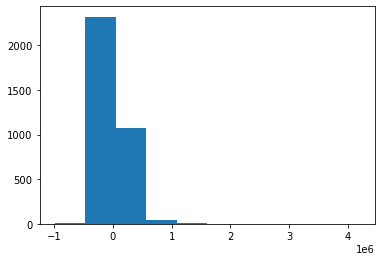

In [43]:
plt.hist(residuals)

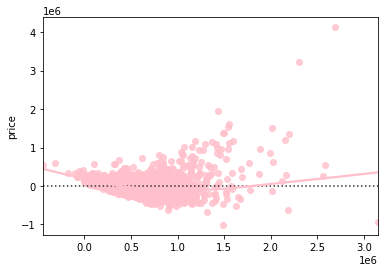

In [46]:
sns.residplot(y_pred, y_test, lowess=True, color="pink")

# Using log of our price variable

In [47]:
target_log = np.log(target)

## Training set

In [48]:
#instantiate a linear regression object
log_model = LinearRegression()

#fit the linear regression to the log of the target variable
log_model.fit(X_train, np.log(y_train))

#access output
print(log_model.intercept_)
print(log_model.coef_)

-9.121540150237339
[ 1.15947843e-04  4.99267300e-07  9.40991825e-02  3.54676767e-01
  6.15019194e-02  6.54830570e-02  1.62718664e-01  4.15945503e-05
  7.43532923e-05 -2.77982026e-03  4.25702249e-05 -6.51674342e-04
  1.40355238e+00 -1.85328707e-01  9.41783915e-05 -1.72757984e-07]


In [49]:
y_log_train_pred = log_model.predict(X_train)

In [50]:
# this gets it back into dollar amounts 
y_log_train_pred = np.exp(y_log_train_pred)

In [51]:
log_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_log_train_pred))
print('Root Mean Squared Error:' , log_train_rmse)

Root Mean Squared Error: 192575.83582081491


## Test set

In [52]:
y_log_pred = log_model.predict(X_test)

In [53]:
y_log_pred = np.exp(y_log_pred)

In [54]:
test__log_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_log_pred))
print('Root Mean Squared Error:' + str(test__log_rmse))

Root Mean Squared Error:278409.4370846541


In [55]:
# Comparing Original vs. Logged
print('Original: ', int(test_rmse), "vs. Logged: ", int(test__log_rmse))

Original:  213770 vs. Logged:  278409


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        4.000e+00, 8.300e+01, 3.069e+03, 2.530e+02, 3.800e+01, 7.000e+00]),
 array([-11696679.36973483, -11256064.96465462, -10815450.55957442,
        -10374836.15449421,  -9934221.749414  ,  -9493607.3443338 ,
         -9052992.93925359,  -8612378.53417338,  -8171764.12909318,
         -7731149.72401297,  -7290535.31893276,  -6849920.91385255,
         -6409306.50877235,  -5968692.10369214,  -5528077.69861193,
         -5087463.29353173,  -4646848.88845152,  -4206234.48337131,
         -3765620.07829111,  -3325005.6732109 ,  -2884391.26813069,
         -2443776.86305049,  -2003162.45797028,  -1562548.05289007,
         -1121933.64780986,   -681319.24272966,   -240704.83764945,
           19990

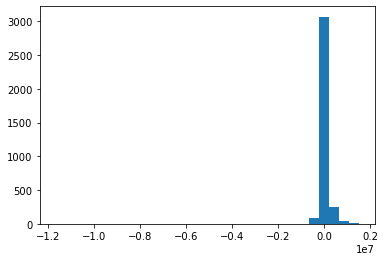

In [56]:
residuals = (y_test- y_log_pred)

plt.hist(residuals, bins=30)

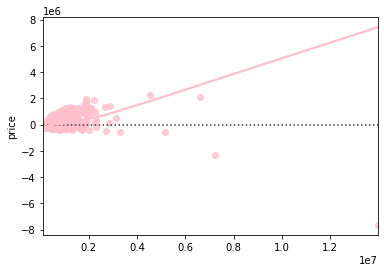

In [57]:
sns.residplot(y_log_pred, y_test, lowess=True, color="pink")

# Polynomial model

In [59]:
#call train_test_split on the data and capture the results
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(df_poly3, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train_poly.shape, "Target: ", y_train_poly.shape)
print("Testing set - Features: ", X_test_poly.shape, "Target: ",y_test_poly.shape)

Training set - Features:  (13832, 968) Target:  (13832,)
Testing set - Features:  (3458, 968) Target:  (3458,)


## Training set

In [60]:
#instantiate a linear regression object
lr_poly = LinearRegression()

#fit the linear regression to the data
lr_poly = lr_poly.fit(X_train_poly, y_train_poly)

In [61]:
# predicting on the training set
poly_trn_predict = lr_poly.predict(X_train_poly)

In [62]:
# evaluating training data 
train_rmse_poly = np.sqrt(metrics.mean_squared_error(y_train_poly,poly_trn_predict ))

print('Root Mean Squared Error:' , train_rmse_poly)

Root Mean Squared Error: 336891.84907910484


## Test set

In [63]:
poly_tst_predict = lr_poly.predict(X_test_poly)

In [64]:
test_rmse_poly = np.sqrt(metrics.mean_squared_error(y_test_poly, poly_tst_predict))

In [65]:
print('Root Mean Squared Error:' + str(test_rmse_poly))

Root Mean Squared Error:953777.8849133268


In [66]:
print('Training: ', int(train_rmse_poly), "vs. Testing: ", int(test_rmse_poly))

Training:  336891 vs. Testing:  953777


# Feature Selection

In [69]:
# We do not want to fit a test set to the scaler

# IF YOU ARE TO USE A SCALER, WHEN YOU GET TO THE HOLDOUT SET YOU ARE NOT
# TO NOT REFIT A NEW SCALER TO THE HOLDOUT DATA 

scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [70]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 205601.07222721216


In [71]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 213775.4696578795
Training:  205601 vs. Testing:  213775


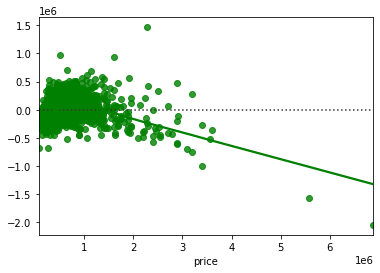

In [72]:
sns.residplot( y_test, y_test_pred,lowess=True, color="g")

# Scaling polynomial features

In [73]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living sqft_basement,sqft_living yr_built,sqft_living yr_renovated,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot yr_built,sqft_lot yr_renovated,sqft_lot zipcode,sqft_lot lat,sqft_lot long,sqft_lot sqft_living15,sqft_lot sqft_lot15,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_above,floors sqft_basement,floors yr_built,floors yr_renovated,floors zipcode,floors lat,floors long,floors sqft_living15,floors sqft_lot15,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_above,waterfront sqft_basement,waterfront yr_built,waterfront yr_renovated,waterfront zipcode,waterfront lat,waterfront long,waterfront sqft_living15,waterfront sqft_lot15,view^2,view condition,view grade,view sqft_above,view sqft_basement,view yr_built,view yr_renovated,view zipcode,view lat,view long,view sqft_living15,view sqft_lot15,condition^2,condition grade,condition sqft_above,condition sqft_basement,condition yr_built,condition yr_renovated,condition zipcode,condition lat,condition long,condition sqft_living15,condition sqft_lot15,grade^2,grade sqft_above,grade sqft_basement,grade yr_built,grade yr_renovated,grade zipcode,grade lat,grade long,grade sqft_living15,grade sqft_lot15,sqft_above^2,sqft_above sqft_basement,sqft_above yr_built,sqft_above yr_renovated,sqft_above zipcode,sqft_above lat,sqft_above long,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_basement^2,sqft_basement yr_built,sqft_basement yr_renovated,sqft_basement zipcode,sqft_basement lat,sqft_basement long,sqft_basement sqft_living15,sqft_basement sqft_lot15,yr_built^2,yr_built yr_renovated,yr_built zipcode,yr_built lat,yr_built long,yr_built sqft_living15,yr_built sqft_lot15,yr_renovated^2,yr_renovated zipcode,yr_renovated lat,yr_renovated long,yr_renovated sqft_living15,yr_renovated sqft_lot15,zipcode^2,zipcode lat,zipcode long,zipcode sqft_living15,zipcode sqft_lot15,lat^2,lat long,lat sqft_living15,lat sqft_lot15,long^2,long sqft_living15,long sqft_lot15,sqft_living15^2,sqft_living15 sqft_lot15,sqft_lot15^2
0,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,2070.0,0.0,1986.0,0.0,98058.0,47.4388,-122.162,2390.0,7700.0,4284900.0,18408510.0,4140.0,0.0,0.0,8280.0,16560.0,4284900.0,0.0,4111020.0,0.0,202980060.0,98198.316,-252875.34,4947300.0,15939000.0,79085449.0,17786.0,0.0,0.0,35572.0,71144.0,18408510.0,0.0,17661498.0,0.0,8.720298e+08,421873.2484,-1086386.666,21254270.0,68476100.0,4.0,0.0,0.0,8.0,16.0,4140.0,0.0,3972.0,0.0,196116.0,94.8776,-244.324,4780.0,15400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,-0.000,0.0,0.0,16.0,32.0,8280.0,0.0,7944.0,0.0,392232.0,189.7552,-488.648,9560.0,30800.0,64.0,16560.0,0.0,15888.0,0.0,784464.0,379.5104,-977.296,19120.0,61600.0,4284900.0,0.0,4111020.0,0.0,202980060.0,98198.316,-252875.34,4947300.0,15939000.0,0.0,0.0,0.0,0.0,0.000,-0.00,0.0,0.0,3944196.0,0.0,194743188.0,94213.4568,-242613.732,4746540.0,15292200.0,0.0,0.0,0.0,-0.0,0.0,0.0,9.615371e+09,4.651754e+06,-1.197896e+07,234358620.0,7.550466e+08,2250.439745,-5795.218686,113378.732,365278.7600,14923.554244,-291967.18,-940647.400,5712100.0,18403000.0,59290000.0
1,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,1830.0,1070.0,1977.0,0.0,98115.0,47.6784,-122.285,2370.0,6283.0,8410000.0,19517000.0,2900.0,0.0,0.0,14500.0,23200.0,5307000.0,3103000.0,5733300.0,0.0,284533500.0,138267.360,-354626.50,6873000.0,18220700.0,45292900.0,6730.0,0.0,0.0,33650.0,53840.0,12315900.0,7201100.0,13305210.0,0.0,6.603140e+08,320875.6

In [79]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=9,test_size=0.2)

In [80]:
# ONLY SCALE TRAINING TEST TO SCALER


scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly2.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_poly2.columns)

In [77]:
# Look to see that they are all in standard deviations
X_test.head()

,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living sqft_basement,sqft_living yr_built,sqft_living yr_renovated,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot yr_built,sqft_lot yr_renovated,sqft_lot zipcode,sqft_lot lat,sqft_lot long,sqft_lot sqft_living15,sqft_lot sqft_lot15,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_above,floors sqft_basement,floors yr_built,floors yr_renovated,floors zipcode,floors lat,floors long,floors sqft_living15,floors sqft_lot15,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_above,waterfront sqft_basement,waterfront yr_built,waterfront yr_renovated,waterfront zipcode,waterfront lat,waterfront long,waterfront sqft_living15,waterfront sqft_lot15,view^2,view condition,view grade,view sqft_above,view sqft_basement,view yr_built,view yr_renovated,view zipcode,view lat,view long,view sqft_living15,view sqft_lot15,condition^2,condition grade,condition sqft_above,condition sqft_basement,condition yr_built,condition yr_renovated,condition zipcode,condition lat,condition long,condition sqft_living15,condition sqft_lot15,grade^2,grade sqft_above,grade sqft_basement,grade yr_built,grade yr_renovated,grade zipcode,grade lat,grade long,grade sqft_living15,grade sqft_lot15,sqft_above^2,sqft_above sqft_basement,sqft_above yr_built,sqft_above yr_renovated,sqft_above zipcode,sqft_above lat,sqft_above long,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_basement^2,sqft_basement yr_built,sqft_basement yr_renovated,sqft_basement zipcode,sqft_basement lat,sqft_basement long,sqft_basement sqft_living15,sqft_basement sqft_lot15,yr_built^2,yr_built yr_renovated,yr_built zipcode,yr_built lat,yr_built long,yr_built sqft_living15,yr_built sqft_lot15,yr_renovated^2,yr_renovated zipcode,yr_renovated lat,yr_renovated long,yr_renovated sqft_living15,yr_renovated sqft_lot15,zipcode^2,zipcode lat,zipcode long,zipcode sqft_living15,zipcode sqft_lot15,lat^2,lat long,lat sqft_living15,lat sqft_lot15,long^2,long sqft_living15,long sqft_lot15,sqft_living15^2,sqft_living15 sqft_lot15,sqft_lot15^2
0,-0.512760,-0.095957,-0.907294,-0.09276,-0.307932,2.434547,-0.556015,-0.930314,0.664406,0.380503,-0.207878,-0.836653,1.035278,0.111109,-0.550724,-0.143101,-0.464911,-0.154330,-0.749676,-0.082659,-0.267913,0.300057,-0.534004,-0.599832,0.091647,-0.500709,-0.185322,-0.513609,-0.507248,0.513115,-0.534109,-0.200454,-0.055611,-0.164609,-0.065671,-0.090649,0.035267,-0.124184,-0.189092,0.076830,-0.094991,-0.083701,-0.096050,-0.095085,0.095872,-0.160071,-0.091733,-0.830872,-0.088073,-0.284795,0.005877,-0.880331,-0.896063,0.338576,-0.881585,-0.196745,-0.908147,-0.901143,0.907610,-0.826199,-0.223128,-0.09276,-0.091696,-0.09073,-0.090915,-0.082935,-0.062305,-0.09275,-0.045836,-0.09276,-0.092759,0.09276,-0.088712,-0.071607,-0.263811,-0.300778,-0.298595,-0.267956,-0.208212,-0.30783,-0.088932,-0.307931,-0.307925,0.307929,-0.286286,-0.12598,2.631627,1.555768,-0.328998,1.150692,2.567177,-0.205481,2.430871,2.457633,-2.431363,0.521870,0.017345,-0.57078,-0.798829,0.468920,-0.504670,-0.205297,-0.559028,-0.537016,0.557462,-0.574088,-0.173864,-0.685803,0.086479,-0.912525,-0.187267,-0.931103,-0.926283,0.931161,-0.699577,-0.244223,0.094543,0.674901,-0.124515,0.663750,0.667738,-0.663976,0.255968,0.084616,0.375433,-0.207858,0.353960,0.590359,-0.383330,-0.532457,-0.141407,-0.207858,-0.207878,-0.207877,0.207878,-0.195186,-0.096743,-0.836639,0.823565,0.382265,-0.551943,-0.143229,1.036111,-0.880863,-0.543359,-0.142048,-0.111740,0.551419,0.1

**Scaled poly training set**

In [78]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 154911.4859205188


**Scaled poly testing set**

In [81]:
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 157864.0341561107
Training:  154911 vs. Testing:  157864


# Third degree polynomial

In [82]:
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns=poly3_columns)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df_poly3, target, random_state=9,test_size=0.2)
scaler3 = StandardScaler()
# fit the scaler to the training data
scaler3.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler3.transform(X_train), columns=df_poly3.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler3.transform(X_test), columns=df_poly3.columns)

In [84]:
# instantiate a linear regression object
lm_3 = LinearRegression()

#fit the linear regression to the data
lm_3 = lm_3.fit(X_train, y_train)

y_train_pred = lm_3.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

In [85]:
# use fitted model to predict on test data
y_pred = lm_3.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 894293.1995701166
Training:  115644 vs. Testing:  894293


## Looking at correlation coefficients

In [86]:
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(df_features, target, random_state=9,test_size=0.2)

In [87]:
# Create correlation matrix
corr_matrix = X_train_8.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
sqft_living,NaN,0.168833,0.351500,0.121827,0.285025,0.062317,0.760049,0.874431,0.442037,0.316571,0.052999,0.187331,0.051552,0.228677,0.751843,0.170894
sqft_lot,NaN,NaN,0.004269,0.016966,0.077697,0.010798,0.116790,0.181008,0.012922,0.054997,0.005931,0.126555,0.088823,0.219890,0.148123,0.730340
floors,NaN,NaN,NaN,0.026498,0.025216,0.257399,0.456882,0.526344,0.249500,0.481202,0.008334,0.058942,0.045221,0.124712,0.277224,0.010396
waterfront,NaN,NaN,NaN,NaN,0.418471,0.006766,0.096860,0.083276,0.096845,0.020006,0.094712,0.033314,0.006153,0.039215,0.098347,0.024004
view,NaN,NaN,NaN,NaN,NaN,0.040953,0.251795,0.164209,0.283196,0.046915,0.092113,0.090405,0.008581,0.073212,0.283037,0.069932
condition,NaN,NaN,NaN,NaN,NaN,NaN,0.145388,0.157424,0.162766,0.363959,0.060430,0.005186,0.013361,0.109302,0.093753,0.011136
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.755676,0.167599,0.448011,0.011643,0.179040,0.116612,0.191478,0.713230,0.114429
sqft_above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048646,0.420815,0.025760,0.255650,0.002408,0.334193,0.728536,0.186486
sqft_basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126299,0.061486,0.086999,0.110586,0.147097,0.200885,0.007038
yr_built,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.223100,0.344569,0.145054,0.407579,0.327004,0.072863


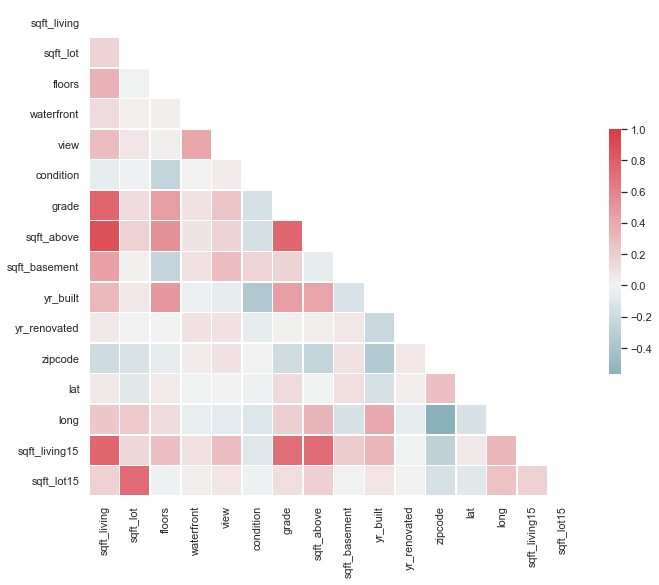

In [88]:
sns.set(style="white")


# Compute the correlation matrix
corr = X_train_8.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [89]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train_8.drop(columns=to_drop, inplace=False)
X_test_8.drop(columns=to_drop, inplace=False)

,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13347,1610,11201,1.0,0,0,5,7,1020,590,1982,0,98033,47.7024,-122.198,1610,9000
12171,1610,13309,1.0,0,0,4,7,1610,0,1967,0,98042,47.3398,-122.133,1610,15725
5900,1900,5520,1.0,0,0,3,7,1280,620,1982,0,98118,47.5549,-122.292,1330,5196
7160,2690,5564,2.0,0,0,3,7,2690,0,2007,0,98038,47.3537,-122.018,2210,4046
13494,1170,8740,1.0,0,0,4,7,1170,0,1968,0,98052,47.6849,-122.117,1870,8448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,1900,10950,1.0,0,0,4,7,1400,500,1959,0,98032,47.3582,-122.284,1700,11850
11094,1870,8190,1.0,0,0,3,7,1100,770,1977,0,98058,47.4521,-122.161,1590,9150
5004,2320,8760,1.0,0,0,4,8,1160,1160,1966,0,98032,47.3627,-122.285,1970,8690
5925,1530,1786,2.0,0,0,3,8,1200,330,2007,0,98117,47.6783,-122.366,1390,2900


## Selecting Features based off F test

In [90]:
X_train.shape

(13832, 968)

In [91]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function f_regression at 0x7feca61f33a0>)

In [92]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [93]:
list(removed_columns)

['sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'sqft_living sqft_lot',
 'sqft_living floors',
 'sqft_living waterfront',
 'sqft_living view',
 'sqft_living condition',
 'sqft_living sqft_above',
 'sqft_living sqft_basement',
 'sqft_living yr_built',
 'sqft_living yr_renovated',
 'sqft_living zipcode',
 'sqft_living lat',
 'sqft_living long',
 'sqft_living sqft_living15',
 'sqft_living sqft_lot15',
 'sqft_lot^2',
 'sqft_lot floors',
 'sqft_lot waterfront',
 'sqft_lot view',
 'sqft_lot condition',
 'sqft_lot grade',
 'sqft_lot sqft_above',
 'sqft_lot sqft_basement',
 'sqft_lot yr_built',
 'sqft_lot yr_renovated',
 'sqft_lot zipcode',
 'sqft_lot lat',
 'sqft_lot long',
 'sqft_lot sqft_living15',
 'sqft_lot sqft_lot15',
 'floors^2',
 'floors waterfront',
 'floors view',
 'floors condition',
 'floors grade',
 'floors sqft_abov

In [94]:
list(selected_columns)

['sqft_living^2',
 'sqft_living grade',
 'sqft_living^2 condition',
 'sqft_living^2 grade',
 'sqft_living^2 yr_built',
 'sqft_living^2 zipcode',
 'sqft_living^2 lat',
 'sqft_living^2 long',
 'sqft_living condition grade',
 'sqft_living condition sqft_above',
 'sqft_living condition sqft_living15',
 'sqft_living grade^2',
 'sqft_living grade yr_built',
 'sqft_living grade zipcode',
 'sqft_living grade lat',
 'sqft_living grade long',
 'sqft_living grade sqft_living15',
 'sqft_living zipcode sqft_living15',
 'sqft_living lat sqft_living15',
 'sqft_living long sqft_living15']

In [95]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 189704.54093518478
Testing Root Mean Squared Error: 177125.2003432698


In [96]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Original:  894293.1995701166 
 KBest:    177125.2003432698 



## Wrapper Method

In [98]:
ols = linear_model.LinearRegression()

In [99]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error')

In [100]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [101]:
list(removed_rfe)

['sqft_living^2',
 'sqft_living sqft_lot',
 'sqft_living waterfront',
 'sqft_living condition',
 'sqft_living sqft_above',
 'sqft_living sqft_basement',
 'sqft_living yr_renovated',
 'sqft_living sqft_living15',
 'sqft_living sqft_lot15',
 'sqft_lot floors',
 'sqft_lot waterfront',
 'sqft_lot sqft_basement',
 'sqft_lot yr_built',
 'sqft_lot yr_renovated',
 'floors^2',
 'floors sqft_above',
 'floors sqft_basement',
 'floors yr_built',
 'floors sqft_lot15',
 'waterfront condition',
 'waterfront grade',
 'waterfront sqft_above',
 'waterfront yr_renovated',
 'waterfront sqft_living15',
 'waterfront sqft_lot15',
 'view^2',
 'view condition',
 'view sqft_basement',
 'view yr_renovated',
 'condition^2',
 'condition grade',
 'condition sqft_basement',
 'condition yr_renovated',
 'sqft_above^2',
 'sqft_above sqft_basement',
 'sqft_above lat',
 'sqft_above long',
 'sqft_above sqft_living15',
 'sqft_basement yr_renovated',
 'sqft_basement sqft_living15',
 'yr_built yr_renovated',
 'yr_renovated s

In [1]:
list(selected_rfe)

NameError: name 'selected_rfe' is not defined

In [103]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)

Training Root Mean Squared Error: 128906.18563381549
Testing Root Mean Squared Error: 148368.02259289933


In [104]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "RFE:     ", testRFE_rmse)

Original:  894293.1995701166 
 KBest:    177125.2003432698 
 RFE:      148368.02259289933


## Lasso

In [105]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )

Training Error: 103011.97517762343
Testing Error: 467387.74588914425


In [107]:
coeff_df = lasso_coef01.T

coeff_df[coeff_df[0]==0].count()

0    0
dtype: int64

In [108]:
coeff_df[coeff_df[0]==0]

,0


In [109]:
print('Original: \t', test_rmse, '\n',
      "KBest: \t", testK_rmse, '\n',
      "RFE: \t \t", testRFE_rmse, '\n', 
      "Lasso 0.01: \t",  test_rmse_lasso01, '\n')

Original: 	 894293.1995701166 
 KBest: 	 177125.2003432698 
 RFE: 	 	 148368.02259289933 
 Lasso 0.01: 	 467387.74588914425 



# Final Model

In [110]:
final_scaler = StandardScaler()

#fit and transform the

df_final_scaled = pd.DataFrame(data=scaler.fit_transform(df_poly3[selected_columns]), columns=selected_columns)

In [ ]:
#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm_final.fit(df_final_scaled, df['price'])

# Save our scaler and best model

In [113]:
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [115]:
pickle_out = open('final_scaler.pickle', "wb")
pickle.dump(scaler, pickle_out)
pickle_out.close

<function BufferedWriter.close>